In [7]:
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
dir_to_scan = "netflix-data"
p = Path(dir_to_scan)

In [9]:
import pandas as pd

In [10]:
folders = []
files = []

for entry in os.scandir(p):
    if entry.is_dir():
        folders.append(entry)
    elif entry.is_file():
        files.append(entry)

print("Folders - {}".format(folders))
print("Files - {}".format(files))

Folders - []
Files - [<DirEntry 'combined_data_2.txt'>, <DirEntry 'combined_data_3.txt'>, <DirEntry 'combined_data_1.txt'>, <DirEntry 'combined_data_4.txt'>]


In [11]:
if not os.path.isfile('data.csv'):

     data = open('data.csv',mode='w')


row = list()


for file in files:


    print("Reading ratings from {}..... ".format(file))


    with open(file, encoding= "ISO-8859-1") as f:


        for i,line in enumerate(f):
            del row[:]
            line = line.strip()
            if ':' in line:
                movie_id = line.replace(':',' ')
            else:
                row = [x for x in line.split(',')]
                row.insert(0,movie_id)
                data.write(','.join(row))  #error in this line
                data.write('\n')
    print("Done.\n")
data.close() 

Reading ratings from <DirEntry 'combined_data_2.txt'>..... 
Done.

Reading ratings from <DirEntry 'combined_data_3.txt'>..... 
Done.

Reading ratings from <DirEntry 'combined_data_1.txt'>..... 
Done.

Reading ratings from <DirEntry 'combined_data_4.txt'>..... 
Done.



In [12]:
data_all = pd.read_csv('data.csv', header = None, names = ['movie_id', 'user_id', 'rating', 'date'])

In [13]:
data_all['date'] = pd.to_datetime(data_all['date'])

In [14]:
data_all.tail()

,movie_id,user_id,rating,date
100480502,17770,1790158,4,2005-11-01
100480503,17770,1608708,3,2005-07-19
100480504,17770,234275,1,2004-08-07
100480505,17770,255278,4,2004-05-28
100480506,17770,453585,2,2005-03-10


In [15]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
movie_id    int64
user_id     int64
rating      int64
date        datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.0 GB


In [16]:
data_all.drop_duplicates()

,movie_id,user_id,rating,date
0,4500,2532865,4,2005-07-26
1,4500,573364,3,2005-06-20
2,4500,1696725,3,2004-02-27
3,4500,1253431,3,2004-03-31
4,4500,1265574,2,2003-09-01
5,4500,1049643,1,2003-11-15
6,4500,1601348,4,2005-04-05
7,4500,1495289,5,2005-07-09
8,4500,1254903,3,2003-09-02
9,4500,2604070,3,2005-05-15


In [17]:
movie_titles = pd.read_csv('movie_titles.csv', header = None, names = ['movie_id', 'year', 'title'], usecols=[0,1,2],encoding = "ISO-8859-1")


In [18]:
movie_titles.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [19]:
ratings_by_title = data_all.groupby(['movie_id']).mean()['rating']

In [14]:
data_all.groupby(['movie_id']).mean()['rating']

movie_id
1        3.749543
2        3.558621
3        3.641153
4        2.739437
5        3.919298
6        3.084396
7        2.129032
8        3.189805
9        2.621053
10       3.180723
11       3.030303
12       3.417582
13       4.552000
14       3.025424
15       3.286207
16       3.098555
17       2.903208
18       3.784369
19       3.324675
20       3.146552
21       3.463303
22       2.246305
23       3.556098
24       2.993998
25       3.970174
26       2.793721
27       3.527473
28       3.823254
29       3.598470
30       3.761842
           ...   
17741    3.287242
17742    2.807259
17743    3.104945
17744    3.511628
17745    3.835237
17746    3.334702
17747    3.526796
17748    3.810989
17749    3.497238
17750    2.863636
17751    3.938182
17752    2.991537
17753    2.473054
17754    3.242347
17755    3.172662
17756    3.770464
17757    3.800000
17758    2.915531
17759    2.691275
17760    2.808126
17761    2.918348
17762    3.645749
17763    3.411855
17764    3.867112
1

In [20]:
ratings_by_title.head()

movie_id
1    3.749543
2    3.558621
3    3.641153
4    2.739437
5    3.919298
Name: rating, dtype: float64

In [22]:
ratings_dict = ratings_by_title.to_dict()

In [23]:
ratings_dict

{1: 3.7495429616087752,
 2: 3.5586206896551724,
 3: 3.6411530815109345,
 4: 2.73943661971831,
 5: 3.9192982456140353,
 6: 3.0843964671246318,
 7: 2.129032258064516,
 8: 3.1898054996646548,
 9: 2.6210526315789475,
 10: 3.1807228915662651,
 11: 3.0303030303030303,
 12: 3.4175824175824174,
 13: 4.5519999999999996,
 14: 3.0254237288135593,
 15: 3.2862068965517239,
 16: 3.0985550203779177,
 17: 2.90320765334834,
 18: 3.7843685879500093,
 19: 3.3246753246753249,
 20: 3.146551724137931,
 21: 3.4633027522935782,
 22: 2.2463054187192117,
 23: 3.5560975609756098,
 24: 2.9939984996249063,
 25: 3.9701739850869924,
 26: 2.7937212079849854,
 27: 3.5274725274725274,
 28: 3.8232541758905212,
 29: 3.5984703632887189,
 30: 3.7618420274800908,
 31: 3.0542986425339365,
 32: 4.0717367853290183,
 33: 4.1686502177068219,
 34: 2.7129629629629628,
 35: 3.1454112038140645,
 36: 3.0202342917997869,
 37: 3.9893238434163703,
 38: 2.0511221945137157,
 39: 2.4361702127659575,
 40: 2.9205702647657841,
 41: 1.63440860

In [24]:
def add_ratings(row):
    return ratings_dict[row['movie_id']]

In [25]:
movie_titles['avg_rating'] = movie_titles.apply (lambda row: add_ratings (row),axis=1)

In [26]:
movie_titles.head()

,movie_id,year,title,avg_rating
0,1,2003.0,Dinosaur Planet,3.749543
1,2,2004.0,Isle of Man TT 2004 Review,3.558621
2,3,1997.0,Character,3.641153
3,4,1994.0,Paula Abdul's Get Up & Dance,2.739437
4,5,2004.0,The Rise and Fall of ECW,3.919298


In [27]:
movie_titles.sort_values(by=['avg_rating'])

,movie_id,year,title,avg_rating
514,515,2005.0,Avia Vampire Hunter,1.287879
16486,16487,2004.0,Zodiac Killer,1.346021
11767,11768,2004.0,Alone in a Haunted House,1.375610
17428,17429,2005.0,Vampire Assassins,1.396761
3574,3575,2005.0,The Worst Horror Movie Ever Made,1.400000
17576,17577,2003.0,Absolution,1.400000
8068,8069,2002.0,Ax 'Em,1.422222
2425,2426,2004.0,Dark Harvest 2: The Maize,1.452381
4201,4202,2004.0,Half-Caste,1.487395
1226,1227,2005.0,The Horror Within,1.496241


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d7cf5fd0>]], dtype=object)

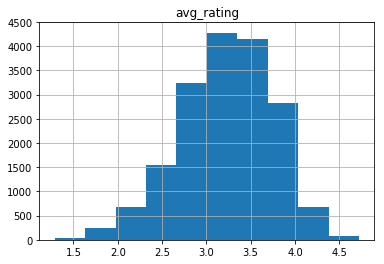

In [30]:
movie_titles.hist(column='avg_rating')


In [32]:
top_15 = movie_titles.sort_values(by=['avg_rating'],  ascending=False).head(15)
movie_titles.sort_values(by=['avg_rating'],  ascending=False).head(15)

,movie_id,year,title,avg_rating
14960,14961,2003.0,Lord of the Rings: The Return of the King: Ext...,4.723270
7229,7230,2001.0,The Lord of the Rings: The Fellowship of the R...,4.716611
7056,7057,2002.0,Lord of the Rings: The Two Towers: Extended Ed...,4.702611
3455,3456,2004.0,Lost: Season 1,4.670989
9863,9864,2004.0,Battlestar Galactica: Season 1,4.638809
15537,15538,2004.0,Fullmetal Alchemist,4.605021
8963,8964,2003.0,Trailer Park Boys: Season 4,4.600000
14790,14791,2003.0,Trailer Park Boys: Season 3,4.600000
10463,10464,1995.0,Tenchi Muyo! Ryo Ohki,4.595506
14549,14550,1994.0,The Shawshank Redemption: Special Edition,4.593384


In [33]:
top_list = top_15['movie_id'].tolist()
top_list

[14961,
 7230,
 7057,
 3456,
 9864,
 15538,
 8964,
 14791,
 10464,
 14550,
 12398,
 3033,
 7833,
 2102,
 4238]

In [34]:
data_top_15 = data_all[data_all['movie_id'].isin(top_list)]
data_top_15.head()

,movie_id,user_id,rating,date
15891602,7057,1777904,5,2005-07-06
15891603,7057,2164355,5,2005-07-07
15891604,7057,1822148,4,2005-07-07
15891605,7057,1432761,5,2005-07-07
15891606,7057,2203206,5,2005-07-07


In [41]:
counts = data_top_15.groupby(['movie_id']).count()
counts

,user_id,rating,date
movie_id,,,
2102,8426,8426,8426
3033,220,220,220
3456,7249,7249,7249
4238,1883,1883,1883
7057,74912,74912,74912
7230,73422,73422,73422
7833,6621,6621,6621
8964,25,25,25
9864,1747,1747,1747


In [40]:
top_15b = pd.merge(top_15, counts, on='movie_id').drop(['rating', 'date'], axis=1)

KeyError: 'movie_id'

In [38]:
top_15b.columns = ['movie_id', 'year', 'title', 'avg_rating', 'user_ratings_counts']

NameError: name 'top_15b' is not defined

In [39]:
top_15b = top_15b.sort_values(by=['user_ratings_counts'], ascending=False)
top_15b

NameError: name 'top_15b' is not defined

In [44]:
sns.set(style="darkgrid")

[Text(0,0,'The Shawshank Redemption: Special Edition'),
 Text(0,0,'Lord of the Rings: The Two Towers: Extended Edition'),
 Text(0,0,'The Lord of the Rings: The Fellowship of the Ring: Extended Edition'),
 Text(0,0,'Lord of the Rings: The Return of the King: Extended Edition'),
 Text(0,0,'The Simpsons: Season 6'),
 Text(0,0,'Lost: Season 1'),
 Text(0,0,'Arrested Development: Season 2'),
 Text(0,0,'Inu-Yasha'),
 Text(0,0,'Battlestar Galactica: Season 1'),
 Text(0,0,'Fullmetal Alchemist'),
 Text(0,0,'Veronica Mars: Season 1'),
 Text(0,0,'Ghost in the Shell: Stand Alone Complex: 2nd Gig'),
 Text(0,0,'Tenchi Muyo! Ryo Ohki'),
 Text(0,0,'Trailer Park Boys: Season 3'),
 Text(0,0,'Trailer Park Boys: Season 4')]

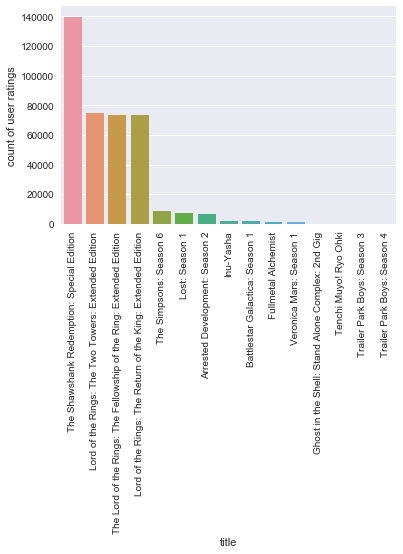

In [55]:
g = sns.barplot(x = top_15b.title, y = top_15b.user_ratings_counts)
plt.ylabel('count of user ratings')
# g.set_xticklabels(rotation=30)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)

[Text(0,0,'The Shawshank Redemption: Special Edition'),
 Text(0,0,'Lord of the Rings: The Two Towers: Extended Edition'),
 Text(0,0,'The Lord of the Rings: The Fellowship of the Ring: Extended Edition'),
 Text(0,0,'Lord of the Rings: The Return of the King: Extended Edition'),
 Text(0,0,'The Simpsons: Season 6'),
 Text(0,0,'Lost: Season 1'),
 Text(0,0,'Arrested Development: Season 2'),
 Text(0,0,'Inu-Yasha'),
 Text(0,0,'Battlestar Galactica: Season 1'),
 Text(0,0,'Fullmetal Alchemist'),
 Text(0,0,'Veronica Mars: Season 1'),
 Text(0,0,'Ghost in the Shell: Stand Alone Complex: 2nd Gig'),
 Text(0,0,'Tenchi Muyo! Ryo Ohki'),
 Text(0,0,'Trailer Park Boys: Season 3'),
 Text(0,0,'Trailer Park Boys: Season 4')]

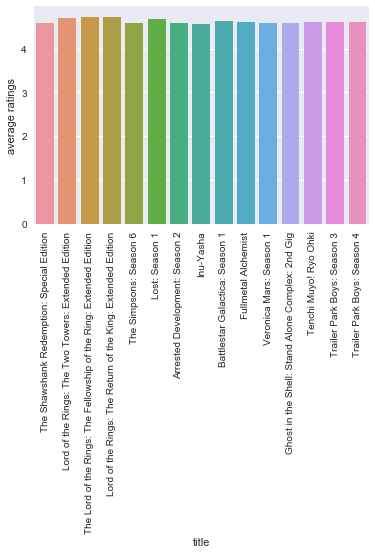

In [57]:
h = sns.barplot(x = top_15b.title, y = top_15b.avg_rating)
plt.ylabel('average ratings')
loc, labels = plt.xticks()
h.set_xticklabels(labels, rotation=90)